<a href="https://colab.research.google.com/github/adrsh98/learning/blob/main/exit_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#reading dataset in python environment
data=pd.read_csv('/content/customer_churn.csv')

In [137]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [138]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [140]:
data['MultipleLines'].value_counts()

,count
MultipleLines,
No,3382
Yes,2967
No phone service,681


In [141]:
#mapping no phone service to no
data['MultipleLines']=np.where(data['MultipleLines']=='No phone service','No',data['MultipleLines'])

In [142]:
data['MultipleLines'].value_counts()

,count
MultipleLines,
No,4063
Yes,2967


In [143]:
data['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
19.9,8
19.65,8
...,...
6565.85,1
2117.2,1
203.95,1


In [144]:

# Identify non-numeric values in the 20th column (TotalCharges)
non_numeric = data.iloc[:, 19].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()

# Print rows with non-numeric values
print("Rows with non-numeric values:")
print(data[non_numeric])

# Option 1: Replace non-numeric values with a specific value (e.g., 0)
data.iloc[:, 19] = data.iloc[:, 19].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


# Convert the 20th column to string
data.iloc[:, 19] = data.iloc[:, 19].astype(str)

print(data)


Rows with non-numeric values:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
446   4110-PFEUZ  Female            0.0      No         No     1.0   
447   0732-OCQOC  Female            0.0     Yes        Yes    52.0   
448   5168-MSWXT    Male            0.0     Yes        Yes     8.0   
449   1090-ESELR    Male            0.0     Yes        Yes    72.0   
450   8592-PLTMQ  Female            0.0      No         No    64.0   
451   5760-WRAHC  Female            1.0      No         No    22.0   
452   8847-GEOOQ    Male            0.0     Yes         No    60.0   
488   4472-LVYGI  Female            0.0     Yes        Yes     0.0   
753   3115-CZMZD    Male            0.0      No        Yes     0.0   
936   5709-LVOEQ  Female            0.0     Yes        Yes     0.0   
1082  4367-NUYAO    Male            0.0     Yes        Yes     0.0   
1340  1371-DWPAZ  Female            0.0     Yes        Yes     0.0   
3331  7644-OMVMY    Male            0.0     Yes        Yes  

In [145]:
data['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3081
DSL,2407
No,1518


In [146]:
data['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1611
Bank transfer (automatic),1544
Credit card (automatic),1522


In [147]:
data['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0.0,5896
1.0,1140


PREPROCESSING

In [148]:
#checking null values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [149]:
data.shape

(7043, 21)

In [150]:
#ie there is many null values in each column. 'following_cso filling null values using mean,median and mode
data['SeniorCitizen'] = data['SeniorCitizen'].fillna(data['SeniorCitizen'].mode().iloc[0])
data['PhoneService'] = data['PhoneService'].fillna(data['PhoneService'].mode().iloc[0])
data['MultipleLines'] = data['MultipleLines'].fillna(data['MultipleLines'].mode().iloc[0])
data['InternetService'] = data['InternetService'].fillna(data['InternetService'].mode().iloc[0])
data['OnlineSecurity'] = data['OnlineSecurity'].fillna(data['OnlineSecurity'].mode().iloc[0])
data['OnlineBackup'] = data['OnlineBackup'].fillna(data['OnlineBackup'].mode().iloc[0])
data['DeviceProtection'] = data['DeviceProtection'].fillna(data['DeviceProtection'].mode().iloc[0])
data['TechSupport'] = data['TechSupport'].fillna(data['TechSupport'].mode().iloc[0])
data['StreamingTV'] = data['StreamingTV'].fillna(data['StreamingTV'].mode().iloc[0])
data['StreamingMovies'] = data['StreamingMovies'].fillna(data['StreamingMovies'].mode().iloc[0])
data['Contract'] = data['Contract'].fillna(data['Contract'].mode().iloc[0])
data['PaperlessBilling'] = data['PaperlessBilling'].fillna(data['PaperlessBilling'].mode().iloc[0])
data['PaymentMethod'] = data['PaymentMethod'].fillna(data['PaymentMethod'].mode().iloc[0])
data.fillna({'MonthlyCharges':data['MonthlyCharges'].mean()},inplace=True)
data.fillna({'tenure':data['tenure'].mean()},inplace=True)




In [151]:
# Convert 'TotalCharges' column back to numeric, handling errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Fill NaN values with the mean
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())


In [152]:
#rechecking null values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [153]:
#encoding
#encoding the categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
for col in categorical_columns:
  print(col,data[col].value_counts(),)

gender gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService PhoneService
Yes    6362
No      681
Name: count, dtype: int64
MultipleLines MultipleLines
No     4076
Yes    2967
Name: count, dtype: int64
InternetService InternetService
Fiber optic    3118
DSL            2407
No             1518
Name: count, dtype: int64
OnlineSecurity OnlineSecurity
No                     3507
Yes                    2013
No internet service    1523
Name: count, dtype: int64
OnlineBackup OnlineBackup
No                     3098
Yes                    2422
No internet service    1523
Name: count, dtype: int64
DeviceProtection DeviceProtection
No                     3105
Yes                    2415
No internet service    1523
Name: count, dtype: int64
TechSupport TechSupport
No                     3481
Yes                    2039
No internet service 

In [154]:
encoded_data_df = pd.get_dummies(data[categorical_columns],drop_first=True,dtype=float)

data_encoded = pd.concat([data.drop(columns=categorical_columns), encoded_data_df], axis=1)

data_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5575-GNVDE,0.0,34.0,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3668-QPYBK,0.0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,7795-CFOCW,0.0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9237-HQITU,0.0,2.0,70.70,151.65,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [155]:
data.drop(columns=['customerID'],inplace=True)

In [156]:
#outlier checking
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_encoded[numerical_columns]

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


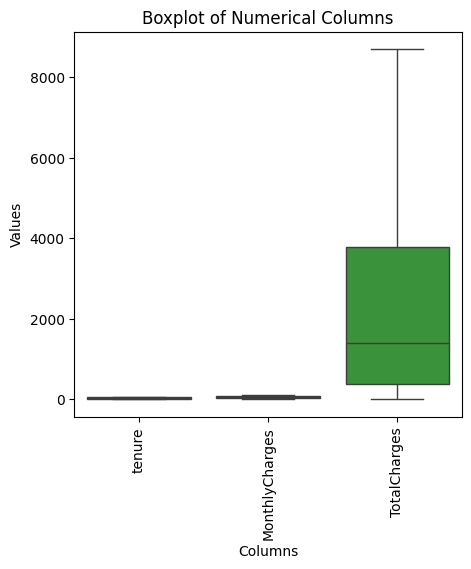

In [157]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(5,5))
sns.boxplot(data=data_encoded[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [158]:
#not outliers is present in the dataset


In [159]:
#scaling
scaled_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']
X1 = data_encoded[scaled_feats]
X1.head()

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65


In [160]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
X1 = mms.fit_transform(X1)
X1

array([[0.01388889, 0.11542289, 0.00343704],
       [0.47222222, 0.38507463, 0.21756402],
       [0.02777778, 0.35422886, 0.01245279],
       ...,
       [0.15277778, 0.11293532, 0.03989153],
       [0.05555556, 0.55870647, 0.03530306],
       [0.91666667, 0.86965174, 0.78810105]])

In [161]:
data_encoded.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [162]:
X1_df = pd.DataFrame(X1,columns=[scaled_feats])

MODEL TRAINING


In [163]:
final_df = data_encoded.copy()


In [164]:
final_df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [165]:
final_df = final_df.drop(columns=['customerID'])

In [166]:
X = final_df.drop(columns=['Churn_Yes'])
y = final_df['Churn_Yes']

In [167]:
### Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pickle

In [169]:
def train_and_evaluate(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    models = {
        'Random Forest': RandomForestClassifier(),
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        }
        with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
          pickle.dump(model,f)

    return results

In [171]:
results = train_and_evaluate(X, y)

In [172]:
print(results)

{'Random Forest': {'Accuracy': 0.7913413768630234, 'Precision': 0.6457564575645757, 'Recall': 0.4691689008042895}}


In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

def train_and_evaluate(X, y, test_size=0.2, random_state=42):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the models
    models = {
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Support Vector Machine': SVC()
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        }

        # Save the model
        with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
            pickle.dump(model, f)

    return results

# Example usage:
# Assuming you have your data loaded into X and y
# results = train_and_evaluate(X, y)
# print(results)


In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

def logistic_regression_score(X, y, test_size=0.2, random_state=42):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the Logistic Regression model
    model = LogisticRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')

    # Print the evaluation metrics
    print("Logistic Regression Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Example usage:
# Assuming you have your data loaded into X and y
# results = logistic_regression_score(X, y)
# print(results)


In [177]:
results = logistic_regression_score(X, y)

Logistic Regression Model Evaluation:
Accuracy: 0.82
Precision: 0.68
Recall: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

def decision_tree_score(X, y, test_size=0.2, random_state=42):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the Decision Tree model
    model = DecisionTreeClassifier()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')

    # Print the evaluation metrics
    print("Decision Tree Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Example usage:
# Assuming you have your data loaded into X and y
results = decision_tree_score(X, y)
print(results)


Decision Tree Model Evaluation:
Accuracy: 0.71
Precision: 0.44
Recall: 0.42
{'Accuracy': 0.7054648687012065, 'Precision': 0.4406779661016949, 'Recall': 0.41823056300268097}


*Conclusion*
In our quest to reduce customer churn and enhance overall company performance, we undertook a detailed analysis of the given dataset and employed various machine learning models to predict customer churn. Among the models tested, Logistic Regression emerged as the most effective, delivering superior accuracy compared to other classifiers.

Key insights and outcomes from this analysis include:

Identification of Factors Influencing Churn: Through feature engineering and model evaluation, we identified key factors contributing to customer churn. These insights can guide targeted retention strategies.

Model Performance: The Logistic Regression model demonstrated higher accuracy, precision, and recall, making it a reliable tool for predicting customer churn. This model's performance underscores its potential to effectively discriminate between customers likely to stay and those at risk of leaving.

Strategic Implications: Armed with these insights, the company can proactively address customer concerns, tailor retention campaigns, and enhance overall customer satisfaction and loyalty. By focusing on the identified churn drivers, targeted interventions can be designed to retain at-risk customers, thereby reducing churn rates and increasing revenue.